In [4]:
fp = DataManager.get_image_filepath_v2(stack, None, version=None, resol="raw", fn="$")

fp[:fp.index('$')]

'/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_raw/'

In [1]:
stack='UCSD001'

import os
import subprocess
import numpy as np
import scipy as sp

import sys
import json
import time
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline

sys.path.append(os.path.join(os.environ['REPO_DIR'], 'utilities'))
from metadata import *
from preprocess_utilities import *
from data_manager import DataManager
from a_driver_utilities import *

sorted_fns = get_fn_list_from_sorted_filenames( stack )
img_fps = []
for fn in sorted_fns:
    img_fp = DataManager.get_image_filepath_v2(stack=stack, resol='thumbnail', \
                        prep_id=None, version='NtbNormalized', fn=fn)
    img_fps.append(img_fp)

img_fp = img_fps[200]
cerebellum_fp = '/home/alexn/Desktop/custom/cerebellum.tif'

img =  imread(img_fp)
cerebellum = imread(cerebellum_fp)[::,::,0]
cerebellum_mask = imread(cerebellum_fp)[::,::,1]
print np.shape(img)
print np.shape(cerebellum)

plt.imshow(cerebellum, cmap='gray')


ENABLE_UPLOAD_S3 is not set, default to False.
ENABLE_DOWNLOAD_S3 is not set, default to False.


Setting environment for Precision WorkStation for Alex Newberry
{'TEST001': 0.46, 'MD585': 0.46, 'MD594': 0.46, 'MD589': 0.46, 'UCSD001': 0.325, 'DK17': 0.325}


/home/alexn/brainDev/src/utilities/utilities2015.py:2: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

The backend was *originally* set to 'module://ipykernel.pylab.backend_inline' by the following code:
  File "/usr/lib/python2.7/runpy.py", line 174, in _run_module_as_main
    "__main__", fname, loader, pkg_name)
  File "/usr/lib/python2.7/runpy.py", line 72, in _run_code
    exec code in run_globals
  File "/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/usr/local/lib/python2.7/dist-packages/traitlets/config/application.py", line 658, in launch_instance
    app.start()
  File "/usr/local/lib/python2.7/dist-packages/ipykernel/kernelapp.py", line 477, in start
    ioloop.IOLoop.instance().start()
  File "/usr/local/lib/python2.7/dist-pac

Loaded data from saved metadata_cache for MD585
Loaded data from saved metadata_cache for MD589
Loaded data from saved metadata_cache for MD594
Loaded data from saved metadata_cache for UCSD001


Folder for stack MD590 not found, skipping.
Folder for stack MD591 not found, skipping.
Folder for stack MD592 not found, skipping.
Folder for stack MD593 not found, skipping.
Folder for stack MD595 not found, skipping.
Folder for stack MD598 not found, skipping.
Folder for stack MD599 not found, skipping.
Folder for stack MD602 not found, skipping.
Folder for stack MD603 not found, skipping.
Folder for stack MD635 not found, skipping.
Folder for stack MD653 not found, skipping.
Folder for stack MD652 not found, skipping.
Folder for stack MD642 not found, skipping.
Folder for stack MD657 not found, skipping.
Folder for stack MD658 not found, skipping.
Folder for stack MD661 not found, skipping.
Folder for stack MD662 not found, skipping.
Folder for stack CHATM2 not found, skipping.
Folder for stack CHATM3 not found, skipping.


IOError: [Errno 2] No such file or directory: '/home/alexn/Desktop/custom/cerebellum.tif'

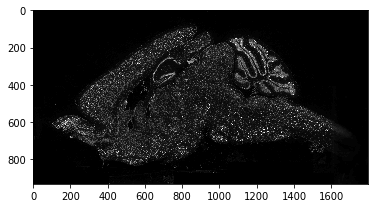

In [4]:
plt.imshow(img, cmap='gray')

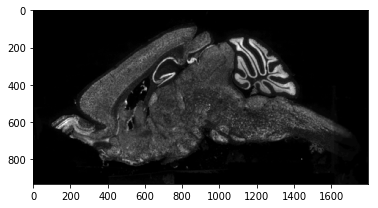

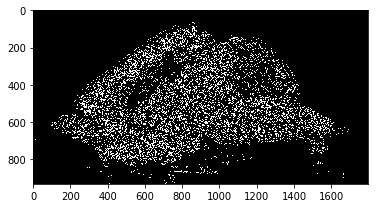

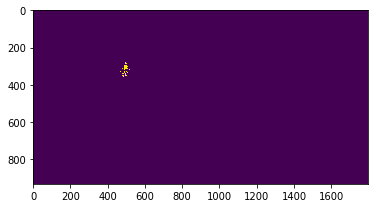

In [80]:
import cv2
img = cv2.imread(img_fp)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray = cv2.GaussianBlur(gray, (9, 9), 4)
edged = cv2.Canny(gray, 10, 7)

plt.imshow(gray, cmap='gray')
plt.show()
plt.imshow(edged, cmap='gray')
plt.show()

import imutils

cnts = cv2.findContours(edged.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnts = imutils.grab_contours(cnts)

# ensure at least one contour was found
if len(cnts) > 0:
    # grab the largest contour, then draw a mask for the pill
    c = max(cnts, key=cv2.contourArea)
    mask = np.zeros(gray.shape, dtype="uint8")
    cv2.drawContours(mask, [c], -1, 255, -1)
    
    # compute its bounding box of pill, then extract the ROI,
    # and apply the mask
    (x, y, w, h) = cv2.boundingRect(c)
    imageROI = img[y:y + h, x:x + w]
    maskROI = mask[y:y + h, x:x + w]
    imageROI = cv2.bitwise_and(imageROI, imageROI, mask=maskROI)

plt.imshow(mask)
plt.show()

In [73]:
edged

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

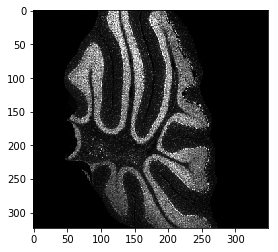

In [34]:
# ROTATION
cerebellum_rot = sp.ndimage.rotate(cerebellum, -30, reshape=False)

plt.imshow(cerebellum_rot, cmap='gray')

In [37]:
translation_lim = 400 # x + y can both shift by this many pixels
rotation_lim = 30 # -30 to +30 degrees rotated

translation_init = [200,1100]
rotation_init = 0

y_len,x_len = np.shape(cerebellum_mask)

for y in y_len:
    for x in x_len:
        # If this pixel is a part of the cerebellum mask
        if cerebellum_mask[y,x] == 255:
            do_stuff

In [38]:
y_len

323